In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
import matplotlib.patches as mpatches


In [2]:
df = pd.read_csv('source/FReDA4.csv')

In [3]:
greens_d = ['#8ccd90', '#6abb78', '#48a961', '#369050', '#357246', '#34523d']
autumn = ['#ff2400', '#ff4900', '#ff6d00', '#ff9200', '#ffb600', '#ffdb00']
RdPu = ['#fdddd9', '#fbbabd', '#f988ad', '#e84a9b', '#bc1085', '#810178']
crest = ['#e2f3f0', '#a8d5d2', '#6fb7b5', '#3e9999', '#257e81', '#1b6468']
summer = ['#00ff66', '#33ff66', '#66ff66', '#99ff66', '#ccff66', '#ffff66']

couples_colors = [summer[0], summer[2], autumn[0], autumn[2], RdPu[2]]
individual_colors = [summer[1], summer[2], summer[3], summer[4],
                     autumn[1], autumn[2], autumn[3], autumn[4]]

couple_ticks = ['Couple Agreement',
                'One-sided Deprivation',
                'One-sided Saturation',
                'Couple Deprivation',
                'Couple Saturation',
                'Couple Disagreement']

([<matplotlib.axis.YTick at 0x216de7d5fd0>,
 [Text(0, -0.5, '3-5 years'),
  Text(0, 0.0, '6-10 years'),
  Text(0, 0.5, '11-20 years')])

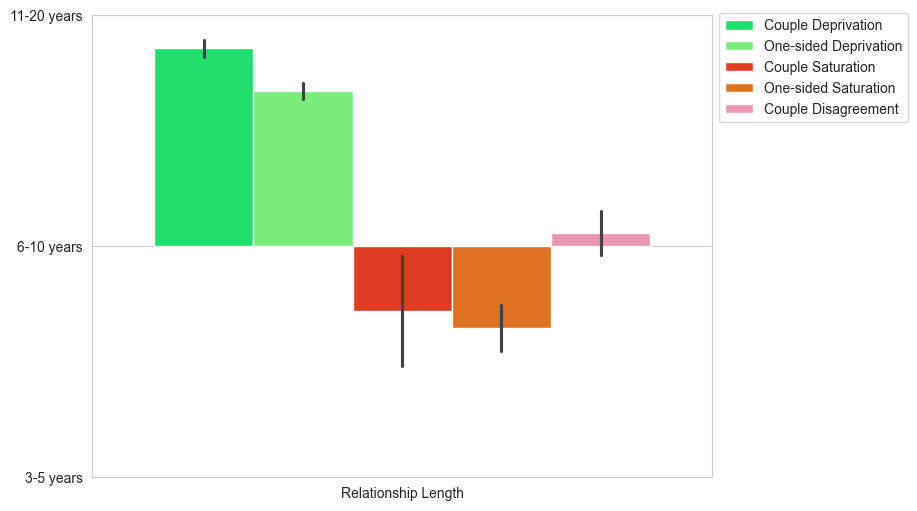

In [4]:
traits = [
    "Relationship Length",
]
t = traits[0].split()[0]

df_couple = df.melt(
    id_vars=["Group2", "Wish for Touch"],
    value_vars=traits,
    var_name="Trait",
    value_name="Score"
)
order = ["Couple Deprivation", "One-sided Deprivation",
         "Couple Saturation", "One-sided Saturation", "Couple Disagreement"]

df_couple_summ = (
    df_couple
    .groupby(["Trait", "Group2"], observed=True)["Score"]
    .agg(['mean', 'std', 'median'])
    .reset_index()
)

mean_baseline = (
    df_couple
    .loc[df_couple["Group2"] == "Couple Agreement", "Score"]
    .mean()
)

df_plot = (
    df_couple
    .assign(Deviation=lambda x: x["Score"] - mean_baseline)
    .query("Group2 != 'Couple Agreement'")
    .assign(Group2=lambda x: pd.Categorical(x["Group2"], categories=order, ordered=True))
)

colors = sns.color_palette('Set3', 5)
plt.figure(figsize=(8, 6))

couples_colors = [summer[0], summer[2], autumn[0], autumn[2], RdPu[2]]

sns.barplot(
    data=df_plot,
    x="Trait",
    y="Deviation",
    hue="Group2",
    errorbar="se",
    palette=couples_colors
)
plt.ylabel("")
plt.xlabel("")
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.02))
# plt.yticks(ticks = df_plot["Deviation"].mean(), labels = df_couple_summ["mean"])

plt.yticks([-0.5, 0, 0.5], ["3-5 years", '6-10 years', "11-20 years"])
# plt.savefig(f'output/img_bg/alles/{t}.png', dpi=600, transparent=False, bbox_inches='tight')

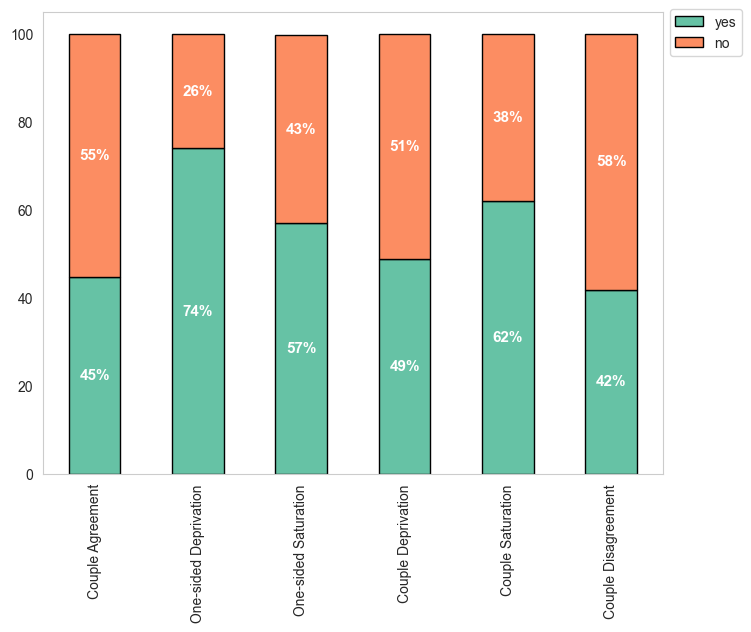

In [5]:
traits = [
    # "Married",
    # "Cohabitation",
    "Kids"
]
t = traits[0].split()[0]

df_couple = df.melt(
    id_vars=["Group2", "Wish for Touch"],
    value_vars=traits,
    var_name="Trait",
    value_name="Score"
)

df_couple_summ = (
    df_couple
    .groupby(["Trait", "Group2"], observed=True)
    .agg(
        yes=("Score", lambda s: 100 * (s > 0).mean()),
        no=("Score", lambda s: 100 * (s < 1).mean()),
        # total=("Score", lambda s: 100),
    )
    .reset_index()
)

ax = df_couple_summ.plot(
    kind='bar',
    stacked=True,
    color=sns.color_palette(palette='Set2'),
    figsize=(8, 6),
    edgecolor='black',
)
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f%%', label_type='center',
                 color='white', fontsize=11, fontweight='bold')

plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.02))

# plt.ylabel("")
# plt.xlabel("")
plt.grid(False)
plt.xticks([0, 1, 2, 3, 4, 5], labels=couple_ticks, rotation=90)
plt.savefig(f'output/img_bg/alles/{t}.png', dpi=600, transparent=False, bbox_inches='tight')

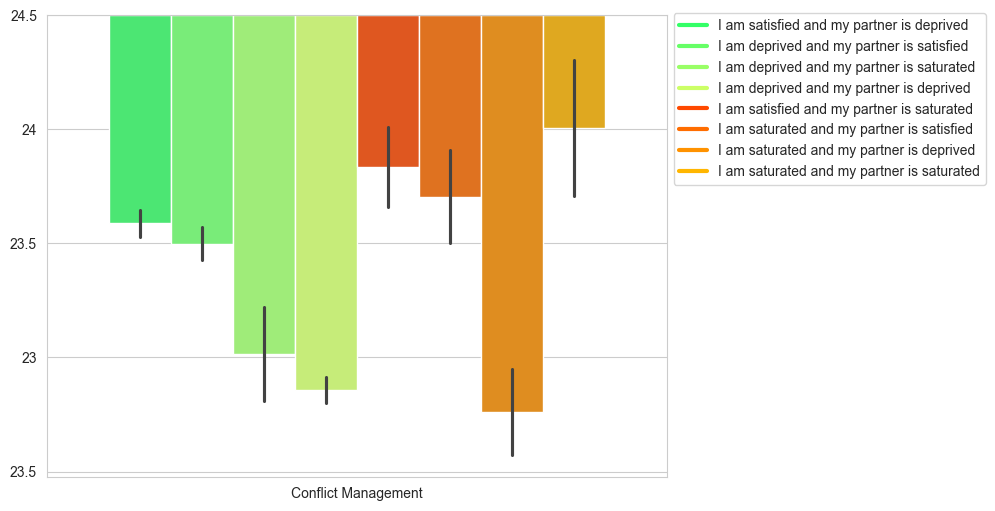

In [50]:
traits = [
    # "Age",
    # "Sex",
    # "Work Status",
    # "Neuroticism",
    # "Extraversion",
    # "Openness",
    # "Agreeableness",
    # "Conscientiousness",
    # "Depressiveness",
    # "Loneliness",
    # "Self-esteem",
    # "Life Satisfaction",
    # "Health",
    # "Communication Quality",
    # "Relationship Satisfaction",
    "Conflict Management",
]
t = traits[0].split()[0]

df_couple = df.melt(
    id_vars=["Group1", "Wish for Touch"],
    value_vars=traits,
    var_name="Trait",
    value_name="Score"
)

df_couple_summ = (
    df_couple
    .groupby(["Trait", "Group1"], observed=True)["Score"]
    .agg(['mean', 'std', 'median'])
    .reset_index()
)

mean_baseline = (
    df_couple
    .loc[df_couple["Group1"] == "SubGroup1", "Score"]
    .mean()
)

df_plot = (
    df_couple
    .assign(Deviation=lambda x: x["Score"] - mean_baseline)
    .query("Group1 != 'SubGroup1'")
    # .assign(Group1=lambda x: pd.Categorical(x["Group1"], categories=order, ordered=True))
)

group_order = ["SubGroup7", "SubGroup2", "SubGroup4", "SubGroup3",
               "SubGroup8", "SubGroup5", "SubGroup9", "SubGroup6"]

colors = sns.color_palette('Set3', 8)
plt.figure(figsize=(8, 6))

group_labels = [
    'I am satisfied and my partner is deprived', 'I am deprived and my partner is satisfied',
    'I am deprived and my partner is saturated', 'I am deprived and my partner is deprived',
    'I am satisfied and my partner is saturated', 'I am saturated and my partner is satisfied',
    'I am saturated and my partner is deprived', 'I am saturated and my partner is saturated',
]

ax = sns.barplot(
    data=df_plot,
    x="Trait",
    y="Deviation",
    hue="Group1",
    hue_order=group_order,  # alphabetical
    errorbar="se",
    palette=individual_colors
)

handles = [
    plt.Line2D([0], [0], color=individual_colors[i], lw=3, label=group_labels[i])
    for i in range(len(group_labels))
]
plt.legend(handles=handles, labels=group_labels, loc='upper left', bbox_to_anchor=(1.0, 1.02))
plt.xlabel("")
plt.ylabel("")

plt.yticks([0, -0.5, -1, -1.5, -2],  ["24.5", "24", "23.5", "23", "23.5"])
plt.savefig(f'output/img_bg/alles/{t}.png', dpi=600, transparent=False, bbox_inches='tight')

artaud = ['#1D4F25',
          '#2F7A39',
          '#47A649',
          '#8ACD58',
          '#D6E24A',
          '#F4E96B',
          '#4A4A4A',
          '#FFFFFF']